# Exercises week 37
**Implementing gradient descent for Ridge and ordinary Least Squares Regression**

Date: **September 8-12, 2025**

## Simple one-dimensional second-order polynomial

We start with a very simple function
defined for $x\in [-2,2]$. You can add noise if you wish. 


$$
f(x)= 2-x+5x^2,
$$

In [36]:
import numpy as np

def sample_from_function(n=100, noise_level=0.1):
    noise = np.random.normal(0, noise_level, n)
    x = np.linspace(-2, 2, n)
    y = 2 - x + 5 * x**2 + noise
    return x, y

x, y = sample_from_function(n=100, noise_level=0.1)
# print(x)
# print(y)

### 1a)

We first need to create the feature matrix. 


In [37]:
def polynomial_features(x, p):
    n = len(x)
    X = np.zeros((n, p+1))
    for j in range(p+1):
        X[:, j] = x**j
    return X

X = polynomial_features(x, 2)
# print(X.shape)

Compute the mean and standard deviation of each column (feature) in your design/feature matrix $\boldsymbol{X}$.
Subtract the mean and divide by the standard deviation for each feature.

We will also center the target $\boldsymbol{y}$ to mean $0$. Centering $\boldsymbol{y}$
(and each feature) means the model does not require a separate intercept
term, the data is shifted such that the intercept is effectively 0
. (In practice, one could include an intercept in the model and not
penalize it, but here we simplify by centering.)
Choose $n=100$ data points and set up $\boldsymbol{x}$, $\boldsymbol{y}$ and the design matrix $\boldsymbol{X}$.

In [38]:
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X_std[X_std == 0] = 1
X_norm = (X - X_mean) / X_std

y_mean = y.mean()
y_centered = y - y_mean

def check_centering():
    print(f"y mean: {y.mean()}")
    print(f"y_centered mean: {y_centered.mean()}")


    from matplotlib import pyplot as plt 
    import matplotlib.pyplot as plt

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    ax1.hist(y, bins=20, alpha=0.7)
    ax1.axvline(y.mean(), color='red', linestyle='--')
    ax1.set_xlim(-5, 25)

    ax2.hist(y_centered, bins=20, alpha=0.7)
    ax2.axvline(y_centered.mean(), color='red', linestyle='--')
    ax2.set_xlim(-5, 25)

    plt.show()


## Exercise 2, calculate the gradients

Find the gradients for OLS and Ridge regression using the mean-squared error as cost/loss function.

In [39]:
def gradient_ols(X, y, theta):
    n = len(y)
    return (1/n) * X.T @ (X @ theta - y)

def gradient_ridge(X, y, theta, lam):
    n = len(y)
    return (1/n) * X.T @ (X @ theta - y) + 2 * lam * theta

## Exercise 3, using the analytical formulae for OLS and Ridge regression to find the optimal parameters $\boldsymbol{\theta}$

### 3a)

Finalize, in the above code, the OLS and Ridge regression determination of the optimal parameters $\boldsymbol{\theta}$.

In [40]:
lam = 0.01

n_features = X_norm.shape[1]
I = np.eye(n_features)
theta_closed_formRidge = np.linalg.pinv(X_norm.T @ X_norm + lam * I) @ X_norm.T @ y_centered
theta_closed_formOLS = np.linalg.pinv(X_norm.T @ X_norm) @ X_norm.T @ y_centered

print("closed-form Ridge coefficients:", theta_closed_formRidge)
print("closed-form OLS coefficients:", theta_closed_formOLS)

closed-form Ridge coefficients: [ 0.         -1.16566494  6.09212444]
closed-form OLS coefficients: [ 0.         -1.1657815   6.09273365]


### 3b)

Explore the results as function of different values of the hyperparameter $\lambda$. See for example exercise 4 from week 36.

Lambda=0.001: [ 0.         -1.16576985  6.09267272]
Lambda=0.01: [ 0.         -1.16566494  6.09212444]
Lambda=0.1: [ 0.         -1.16461689  6.086647  ]
Lambda=1.0: [ 0.         -1.15423911  6.03240955]
Lambda=10.0: [ 0.         -1.05980137  5.53884877]


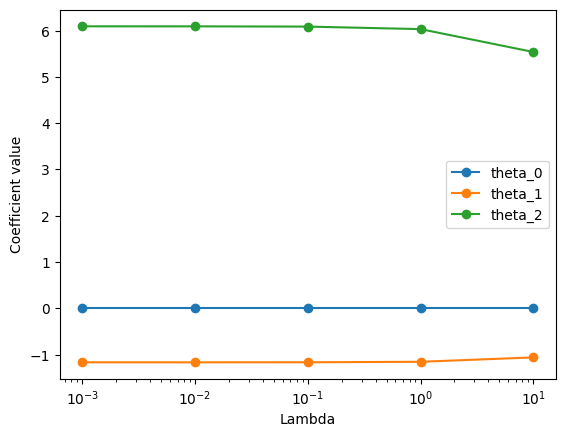

In [41]:
lambdas = [0.001, 0.01, 0.1, 1.0, 10.0]
ridge_coeffs = []

for lam in lambdas:
    theta_ridge = np.linalg.inv(X_norm.T @ X_norm + lam * I) @ X_norm.T @ y_centered
    ridge_coeffs.append(theta_ridge)
    print(f"Lambda={lam}: {theta_ridge}")

import matplotlib.pyplot as plt
ridge_coeffs = np.array(ridge_coeffs)
for i in range(n_features):
    plt.plot(lambdas, ridge_coeffs[:, i], marker='o', label=f'theta_{i}')
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Coefficient value')
plt.legend()
plt.show()

## Exercise 4, Implementing the simplest form for gradient descent

Alternatively, we can fit the ridge regression model using gradient descent. This is useful to visualize the iterative convergence and is necessary if $n$ and $p$ are so large that the closed-form might be too slow or memory-intensive. We derive the gradients from the cost functions defined above. Use the gradients of the Ridge and OLS cost functions with respect to the parameters $\boldsymbol{\theta}$ and set up your own gradient descent code for OLS and Ridge regression.

### 4a)

Write first a gradient descent code for OLS only using the above template. Discuss the results as function of the learning rate parameters and the number of iterations

In [42]:
eta = 0.1
num_iters = 1000

theta_ols = np.zeros(n_features)

for t in range(num_iters):
    grad_OLS = gradient_ols(X_norm, y_centered, theta_ols)
    theta_ols = theta_ols - eta * grad_OLS

print("Gradient Descent OLS coefficients:", theta_ols)
print("Closed-form OLS coefficients:", theta_closed_formOLS)

Gradient Descent OLS coefficients: [ 0.         -1.1657815   6.09273365]
Closed-form OLS coefficients: [ 0.         -1.1657815   6.09273365]


### 4b)

Write then a similar code for Ridge regression using the above template. Try to add a stopping parameter as function of the number iterations and the difference between the new and old $\theta$ values. How would you define a stopping criterion?

In [43]:
eta = 0.1
num_iters = 1000
tol = 1e-6
lam = 0.01

theta_ridge = np.zeros(n_features)

for t in range(num_iters):
    theta_old = theta_ridge.copy()
    grad_Ridge = gradient_ridge(X_norm, y_centered, theta_ridge, lam)
    theta_ridge = theta_ridge - eta * grad_Ridge
    
    if np.linalg.norm(theta_ridge - theta_old) < tol:
        print(f"Converged after {t+1} iterations")
        break

print("Gradient Descent Ridge coefficients:", theta_ridge)
print("Closed-form Ridge coefficients:", theta_closed_formRidge)

Converged after 125 iterations
Gradient Descent Ridge coefficients: [ 0.         -1.14292139  5.97325966]
Closed-form Ridge coefficients: [ 0.         -1.16566494  6.09212444]


**Stopping Criterion:**

I would define a stopping criterion based on the change in parameters between iterations. When the L2 norm of the difference between consecutive parameter vectors falls below a tolerance threshold (e.g., `np.linalg.norm(theta_new - theta_old) < tol`), the algorithm has converged. This indicates that the parameters are no longer changing significantly, so we've found the minimum.

As we can see from the prints, the closed forms and gradient descent are extremely close. 

## Exercise 5, Ridge regression and a new Synthetic Dataset

We create a synthetic linear regression dataset with a sparse underlying relationship. This means we have many features but only a few of them actually contribute to the target. In our example, we'll use 10 features with only 3 non-zero weights in the true model.

In [44]:
np.random.seed(0)

n_samples = 100
n_features = 10

theta_true = np.array([5.0, -3.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0])

X_synth = np.random.randn(n_samples, n_features)
noise = 0.5 * np.random.randn(n_samples)
y_synth = X_synth @ theta_true + noise

X_synth_norm = (X_synth - X_synth.mean(axis=0)) / X_synth.std(axis=0)
y_synth_centered = y_synth - y_synth.mean()

In [45]:
lam = 0.1
I_synth = np.eye(n_features)

theta_ols_analytical = np.linalg.pinv(X_synth_norm) @ y_synth_centered
theta_ridge_analytical = np.linalg.inv(X_synth_norm.T @ X_synth_norm + lam * I_synth) @ X_synth_norm.T @ y_synth_centered

eta = 0.01
num_iters = 1000

theta_ols_gd = np.zeros(n_features)
for t in range(num_iters):
    grad = gradient_ols(X_synth_norm, y_synth_centered, theta_ols_gd)
    theta_ols_gd = theta_ols_gd - eta * grad

theta_ridge_gd = np.zeros(n_features)
for t in range(num_iters):
    grad = gradient_ridge(X_synth_norm, y_synth_centered, theta_ridge_gd, lam)
    theta_ridge_gd = theta_ridge_gd - eta * grad

print("True coefficients:", theta_true)
print("OLS Analytical:", theta_ols_analytical)
print("OLS Gradient Descent:", theta_ols_gd)
print("Ridge Analytical:", theta_ridge_analytical)
print("Ridge Gradient Descent:", theta_ridge_gd)

True coefficients: [ 5. -3.  0.  0.  0.  0.  2.  0.  0.  0.]
OLS Analytical: [ 5.03241281e+00 -2.89258175e+00 -1.55189951e-02  1.51795012e-01
 -6.83299260e-02 -4.40147965e-02  1.76999871e+00  4.37643569e-03
  4.52550260e-02 -4.97610000e-02]
OLS Gradient Descent: [ 5.03052627e+00 -2.88962545e+00 -1.54631907e-02  1.53537540e-01
 -7.12034281e-02 -4.55513413e-02  1.76973981e+00  4.18611669e-03
  4.31429304e-02 -4.94513872e-02]
Ridge Analytical: [ 5.02716096e+00 -2.88896347e+00 -1.55169486e-02  1.52287662e-01
 -6.93302234e-02 -4.47229113e-02  1.76836298e+00  4.62139092e-03
  4.41380481e-02 -4.96664608e-02]
Ridge Gradient Descent: [ 4.17145961 -2.3219415  -0.01540697  0.20874048 -0.1946188  -0.13721978
  1.49447228  0.04064028 -0.10520121 -0.03682043]


**Analysis:**

Ridge regression performs better than OLS for this sparse dataset. Ridge shrinks the coefficients toward zero, which helps when many features are irrelevant (have true coefficient = 0). The regularization penalty helps Ridge identify the important features (0, 1, and 6) while suppressing noise in the irrelevant features. OLS tends to overfit and assigns non-zero weights to irrelevant features due to noise.